In [1]:
import numpy as np
from matplotlib import pyplot as plt

# compute cosmology with class

In [2]:
import pickle
#classy doesnt work with binder so load a (reduced) classy instance...
with open("classy_dict.pkl", "rb") as file:
    classy_dict = pickle.load(file)
    
class ClassyReduced:
    def __init__(self,loaded_dict):
        self.pk = loaded_dict['pk']
        self.pk_lin = loaded_dict['pk_lin']
        self.loaded_dict = loaded_dict
    def get_background(self):
        return self.loaded_dict['get_background']
    def get_current_derived_parameters(self,temp):
        if temp[0] == 'Omega_m':
            return {'Omega_m': 0.30964144154550644}
        if temp[0] == 'h':
            return {'h': 0.6766}
        if temp[0] == 'A_s':
            return {'A_s': 2.105e-09}
        if temp[0] == 'n_s':
            return {'n_s': 0.9665}

cosmo = ClassyReduced(classy_dict)

# So we need to also define survey specific parameters like biases

In [3]:
import cosmo_wap as cw
import cosmo_wap.pk as pk

## Import expression for each contributions

In [4]:
survey_params = cw.survey_params.SurveyParams(cosmo)
print(survey_params.Euclid.__dict__.keys())

dict_keys(['b_1', 'z_range', 'be_survey', 'Q_survey', 'n_g', 'f_sky'])


### CosmologicalFunctions takes in the cosmology and a survey_params dict

In [5]:
#so now we can compute terms for this cosmology and for euclid-likes biases
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid],compute_bias=True)

Computing bias params...


### functions have this format
- xxx.lx(cosmo_funcs,k1,zz=0,t=0,sigma=0,nonlin=False)


### now all parameters we need are computable from cosmo_functions - lets look at an example plots

In [8]:
zz=1 # redshift
kk = np.linspace(0.01,0.1)

Text(0, 0.5, '$ P_0(k) $')

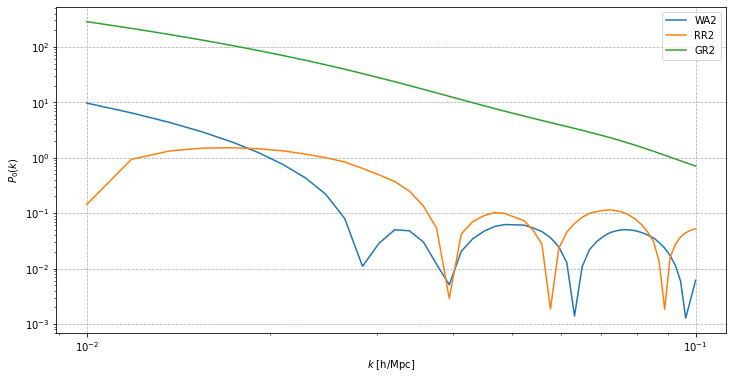

In [11]:
#say for monopole
plt.figure(figsize=(12,6))
zz= 1


plt.plot(kk,np.abs(pk.WA2.l0(cosmo_funcs,kk,zz=zz,t=0).real),label='WA2')
plt.plot(kk,np.abs(pk.RR2.l0(cosmo_funcs,kk,zz=zz,t=0).real),label='RR2')
plt.plot(kk,np.abs(pk.GR2.l0(cosmo_funcs,kk,zz=zz,t=0).real),label='GR2')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')
plt.ylabel(r'$ P_0(k) $')

Text(0, 0.5, '$ P_0(k) $')

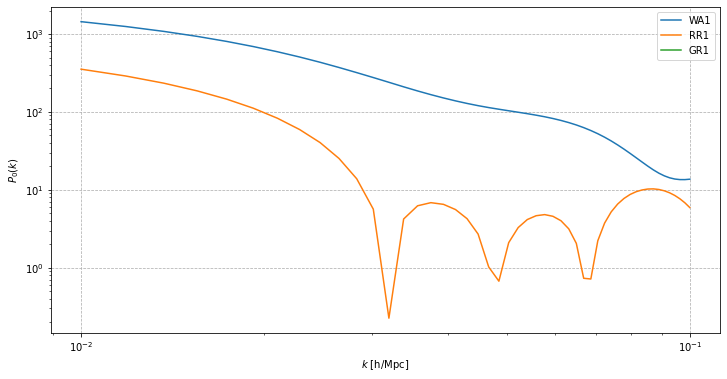

In [12]:
# for dipole
plt.figure(figsize=(12,6))

plt.plot(kk,np.abs(pk.WA1.l1(cosmo_funcs,kk,zz=zz,t=0).imag),label='WA1')
plt.plot(kk,np.abs(pk.RR1.l1(cosmo_funcs,kk,zz=zz,t=0).imag),label='RR1')
plt.plot(kk,np.abs(pk.GR1.l1(cosmo_funcs,kk,zz=zz,t=0).imag),label='GR1')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')
plt.ylabel(r'$ P_0(k) $')

## Or we can consider the multi-tracer case 

In [13]:
#we now assing different survey parameters to survey_params1
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.SKAO2,survey_params.Euclid],compute_bias=False)

Text(0, 0.5, '$ P_0(k) $')

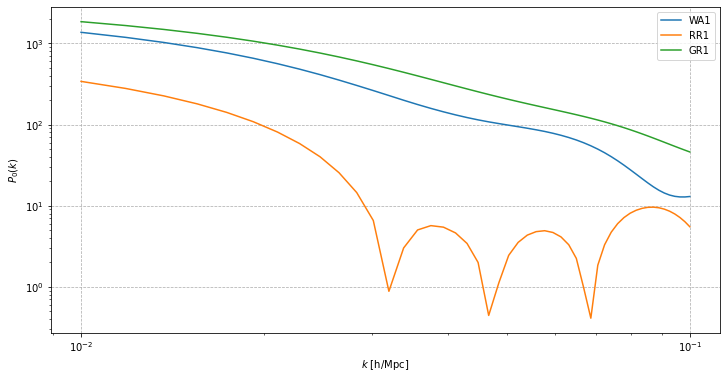

In [14]:
# for dipole - now the GR part does not cancel
plt.figure(figsize=(12,6))

plt.plot(kk,np.abs(pk.WA1.l1(cosmo_funcs,kk,zz=zz,t=0).imag),label='WA1')
plt.plot(kk,np.abs(pk.RR1.l1(cosmo_funcs,kk,zz=zz,t=0).imag),label='RR1')
plt.plot(kk,np.abs(pk.GR1.l1(cosmo_funcs,kk,zz=zz,t=0).imag),label='GR1')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')
plt.ylabel(r'$ P_0(k) $')

In [88]:
#creating composite functions is also useful
class WA_RR:#for all wide separation
    def l0(params,derivs,r,s):
        return WA2.l0(params,r,s)+WARR.l0(params,derivs,r,s)+RR2.l0(params,derivs,r,s)
    
    def l1(params,derivs,r,s):
        return WA1.l1(params,r,s) + RR1.l1(params,derivs,r,s)
    
    def l2(params,derivs,r,s):
        return WA2.l2(params,r,s)+WARR.l2(params,derivs,r,s)+RR2.l2(params,derivs,r,s)
    
class WA_RR_GR:
    def l0(params,derivs,betas,r,s):
        return WA2.l0(params,r,s) +RR2.l0(params,derivs,r,s)+GR2.l0(params,betas)+WAGR.l0(params,betas,r,s)+WARR.l0(params,derivs,r,s)+RRGR.l0(params,derivs,betas,r,s)
    
    def l1(params,derivs,betas,r,s):
        return WA1.l1(params,r,s) +RR1.l1(params,derivs,r,s)+GR1.l1(params,betas)
    
    def l2(params,derivs,betas,r,s):
        return WA2.l2(params,r,s) +RR2.l2(params,derivs,r,s)+GR2.l2(params,betas)+WAGR.l2(params,betas,r,s)+WARR.l2(params,derivs,r,s)+RRGR.l2(params,derivs,betas,r,s)
